In [1]:
%matplotlib inline
import sys
sys.path.append("..") # Adds the module to path

# deeptrack.scatterers

This notebook introduces the module deeptrack.scatterers

## What is a scatterer?

Scatterers are implementations of the abstract class Feature that respresent the complex field at each pixel. All physcial properties of scatterers are given in SI units. The position of a scatterer is measured from the top left corner and can either be given in pixels or meters by setting the property `position_unit` to `"pixel"` or `"meter"`, but defaults to meters.

All scatterers need a reference to the optical system the scatterers are viewed through to calculate scale factors. This is achieved by calling an optical device from the [optics](optics_example.ipynb) module with the scatterer. 

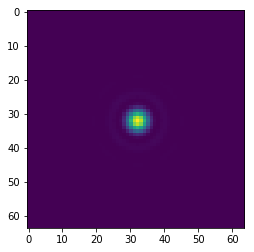

In [5]:
from deeptrack.optics import OpticalDevice
from deeptrack.scatterers import PointParticle

import numpy as np
import matplotlib.pyplot as plt

optics = OpticalDevice(
    NA=0.7,
    wavelength=680e-9,
    pixel_size=100e-9
)

scatterer = PointParticle(
    intensity=100,        # Squared magnitude of the field. 
    position=(32, 32),    # Position of the particle
    position_unit="pixel" # Scale of the position keyword, default meter
)


imaged_scatterer = optics(scatterer)

input_image = np.zeros((64, 64))
output_image = imaged_scatterer.resolve(input_image)

plt.imshow(output_image)
plt.show()


This also convolves the scatterer with the pupil function of the optical device. To resolve a scatterer without convolving it with a pupil function, the optical properties can be passed as inputs to the constructor, or as keyword arguments in the resolve call.

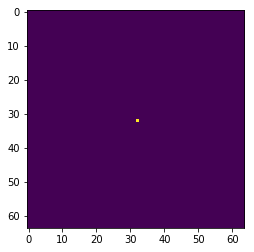

In [6]:
scatterer = PointParticle(
    intensity=100,
    position=(3.2e-6, 3.2e-6),
    position_unit="meter",
    pixel_size=100e-9
)

output_image = scatterer.resolve(input_image)

plt.imshow(output_image)
plt.show()

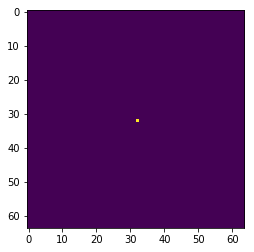

In [7]:
scatterer = PointParticle(
    intensity=100,
    position=(3.2e-6, 3.2e-6),
    position_unit="meter",
)

output_image = scatterer.resolve(input_image, pixel_size=100e-9)

plt.imshow(output_image)
plt.show()